<a href="https://colab.research.google.com/github/brahma2024/Deep-Implicit-Layers/blob/main/ContinuousNormalizingFlows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNF
- Reference: [Neural ODE paper ](https://arxiv.org/pdf/1806.07366)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

**a Random Variable with a Normal Distribution**

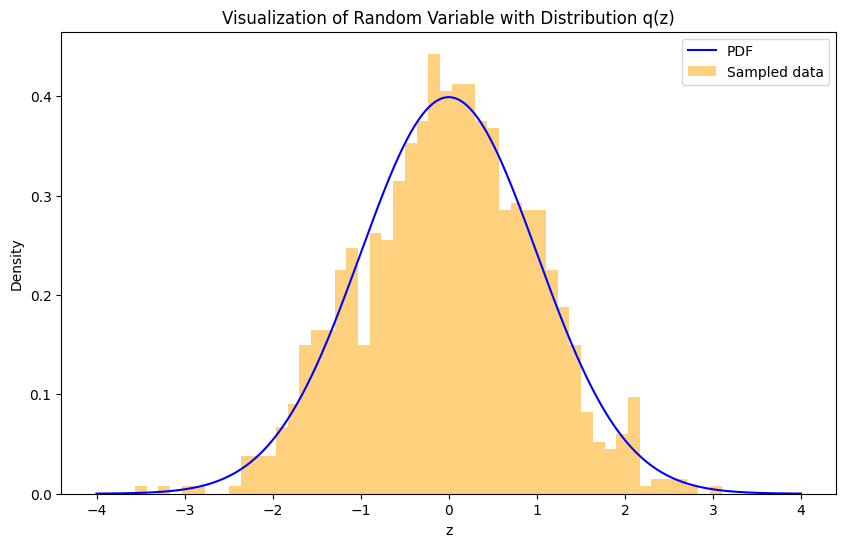

In [2]:
# Define the parameters for the normal distribution
mu = 0  # Mean of the distribution
sigma = 1  # Standard deviation of the distribution

# Define the probability density function (PDF) for the normal distribution
def q(z, mu, sigma):
    return norm.pdf(z, mu, sigma)

# Generate random samples from the distribution
z_samples = np.random.normal(mu, sigma, 1000)

# Create a range of z values for plotting the PDF
z_values = np.linspace(-4, 4, 1000)

# Calculate the PDF values for the range of z values
pdf_values = q(z_values, mu, sigma)

# Plot the PDF and the histogram of the random samples
plt.figure(figsize=(10, 6))

# Plot the PDF
plt.plot(z_values, pdf_values, label='PDF', color='blue')

# Plot the histogram of the random samples
plt.hist(z_samples, bins=50, density=True, alpha=0.5, label='Sampled data', color='orange')

# Add labels and title
plt.xlabel('z')
plt.ylabel('Density')
plt.title('Visualization of Random Variable with Distribution q(z)')
plt.legend()

# Show the plot
plt.show()

**The transformation of probability densities under a smooth, invertible mapping.**

When we have a random variable $z$ with a known probability density function (PDF) $q(z)$, and we apply a transformation to $z$ using a smooth, invertible function $g$ with inverse $g^{-1}$
 , the PDF of the transformed variable $x=g(z)$ can be found using the change of variables formula.

`Change of Variables Formula for Densities`

Given: A random variable $z$ with PDF $q(z)$.

A smooth, invertible function $x = g(z)$, with inverse $z = g^{-1}(x)$.
The PDF of 𝑥 is given by:
$$p(x) = q(g^{-1}(x)) \frac{d}{dx} g^{-1}(x)$$

where $$∣\frac{d}{dx} g^{-1}(x)∣$$ is the absolute value of the determinant of the Jacobian of the inverse transformation.

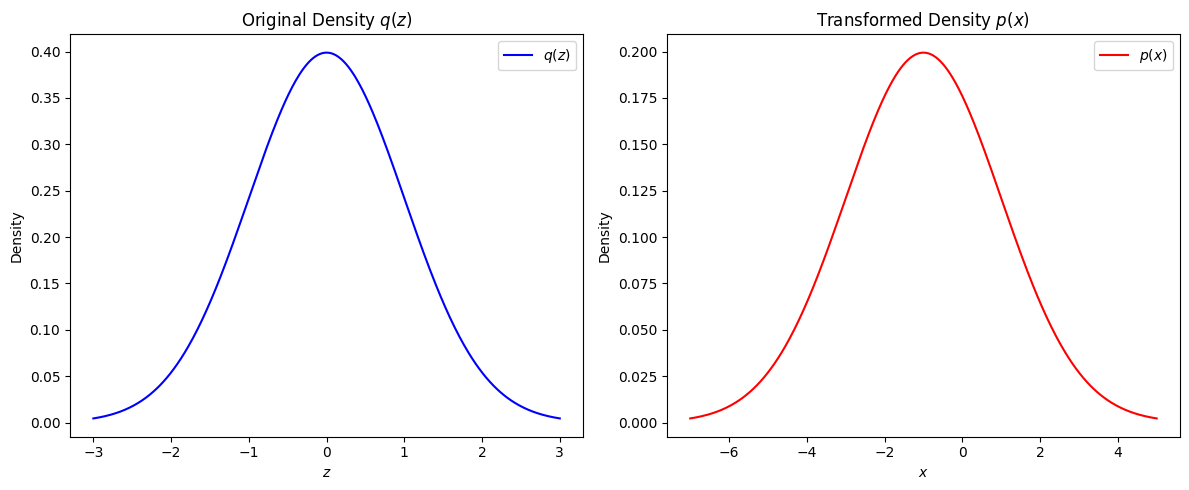

In [4]:
# Define the original probability density function q(z)
def q_z(z):
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

# Define the affine transformation: x = a * z + b
a = 2.0  # Scaling factor
b = -1.0  # Translation factor
def g(z):
    return a * z + b

# Define the transformed probability density function p(x)
def p_x(x):
    return q_z((x - b) / a) / abs(a)

# Create a range of z values
z_values = np.linspace(-3, 3, 400)

# Calculate the original density q(z)
q_z_values = q_z(z_values)

# Calculate the corresponding x values and transformed density p(x)
x_values = g(z_values)
p_x_values = p_x(x_values)

# Plot the original and transformed densities side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original density q(z)
axs[0].plot(z_values, q_z_values, label=r'$q(z)$', color='blue')
axs[0].set_title("Original Density $q(z)$")
axs[0].set_xlabel("$z$")
axs[0].set_ylabel("Density")
axs[0].legend()

# Plot the transformed density p(x)
axs[1].plot(x_values, p_x_values, label=r'$p(x)$', color='red')
axs[1].set_title("Transformed Density $p(x)$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.tight_layout()
plt.show()


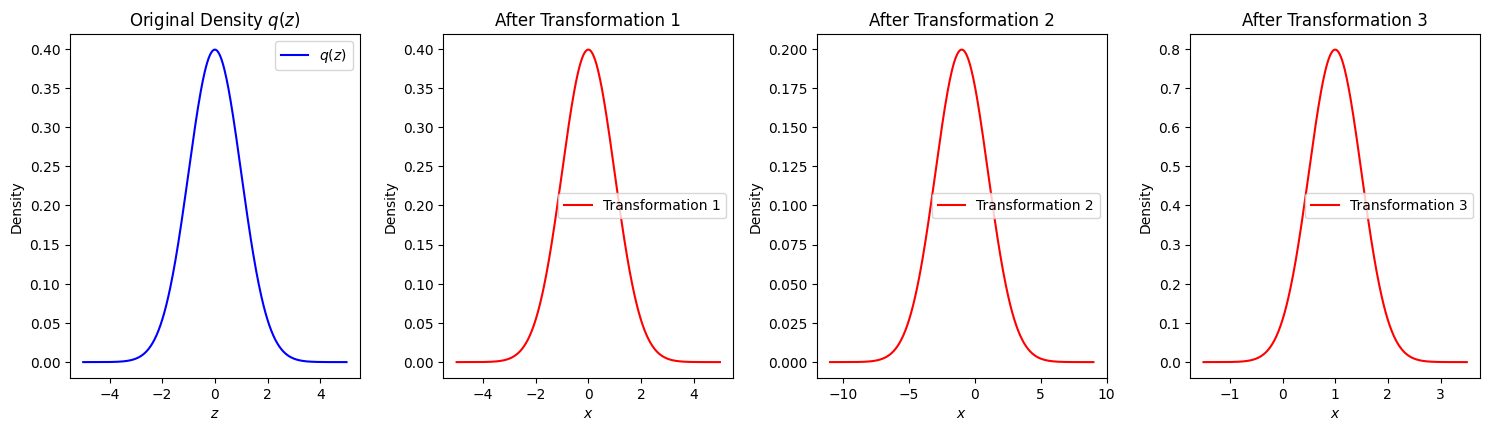

In [5]:
# Define the original standard normal distribution q(z)
def q(z):
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

# Define transformations
def affine_transform(z, a, b):
    return a * z + b

def jacobian_determinant(a):
    return abs(a)

# Parameters for transformations
transforms = [
    {'a': 1.0, 'b': 0.0},  # Identity transformation
    {'a': 2.0, 'b': -1.0}, # Scaling and shifting
    {'a': 0.5, 'b': 1.0}   # Another scaling and shifting
]

# Create a range of z values
z_values = np.linspace(-5, 5, 400)
q_z_values = q(z_values)

# Initialize x values and the final density p(x)
x_values = z_values
p_x_values = q_z_values

# Plot original density
plt.figure(figsize=(15, 8))

# Plot the original density q(z)
plt.subplot(2, len(transforms)+1, 1)
plt.plot(z_values, q_z_values, label=r'$q(z)$', color='blue')
plt.title("Original Density $q(z)$")
plt.xlabel("$z$")
plt.ylabel("Density")
plt.legend()

# Apply transformations
for i, trans in enumerate(transforms):
    a = trans['a']
    b = trans['b']

    # Apply the affine transformation
    x_values = affine_transform(z_values, a, b)

    # Compute the transformed density
    p_x_values = q((x_values - b) / a) / abs(a)

    # Plot the transformed density
    plt.subplot(2, len(transforms)+1, i+2)
    plt.plot(x_values, p_x_values, label=f'Transformation {i+1}', color='red')
    plt.title(f"After Transformation {i+1}")
    plt.xlabel("$x$")
    plt.ylabel("Density")
    plt.legend()

# Final plot
plt.tight_layout()
plt.show()


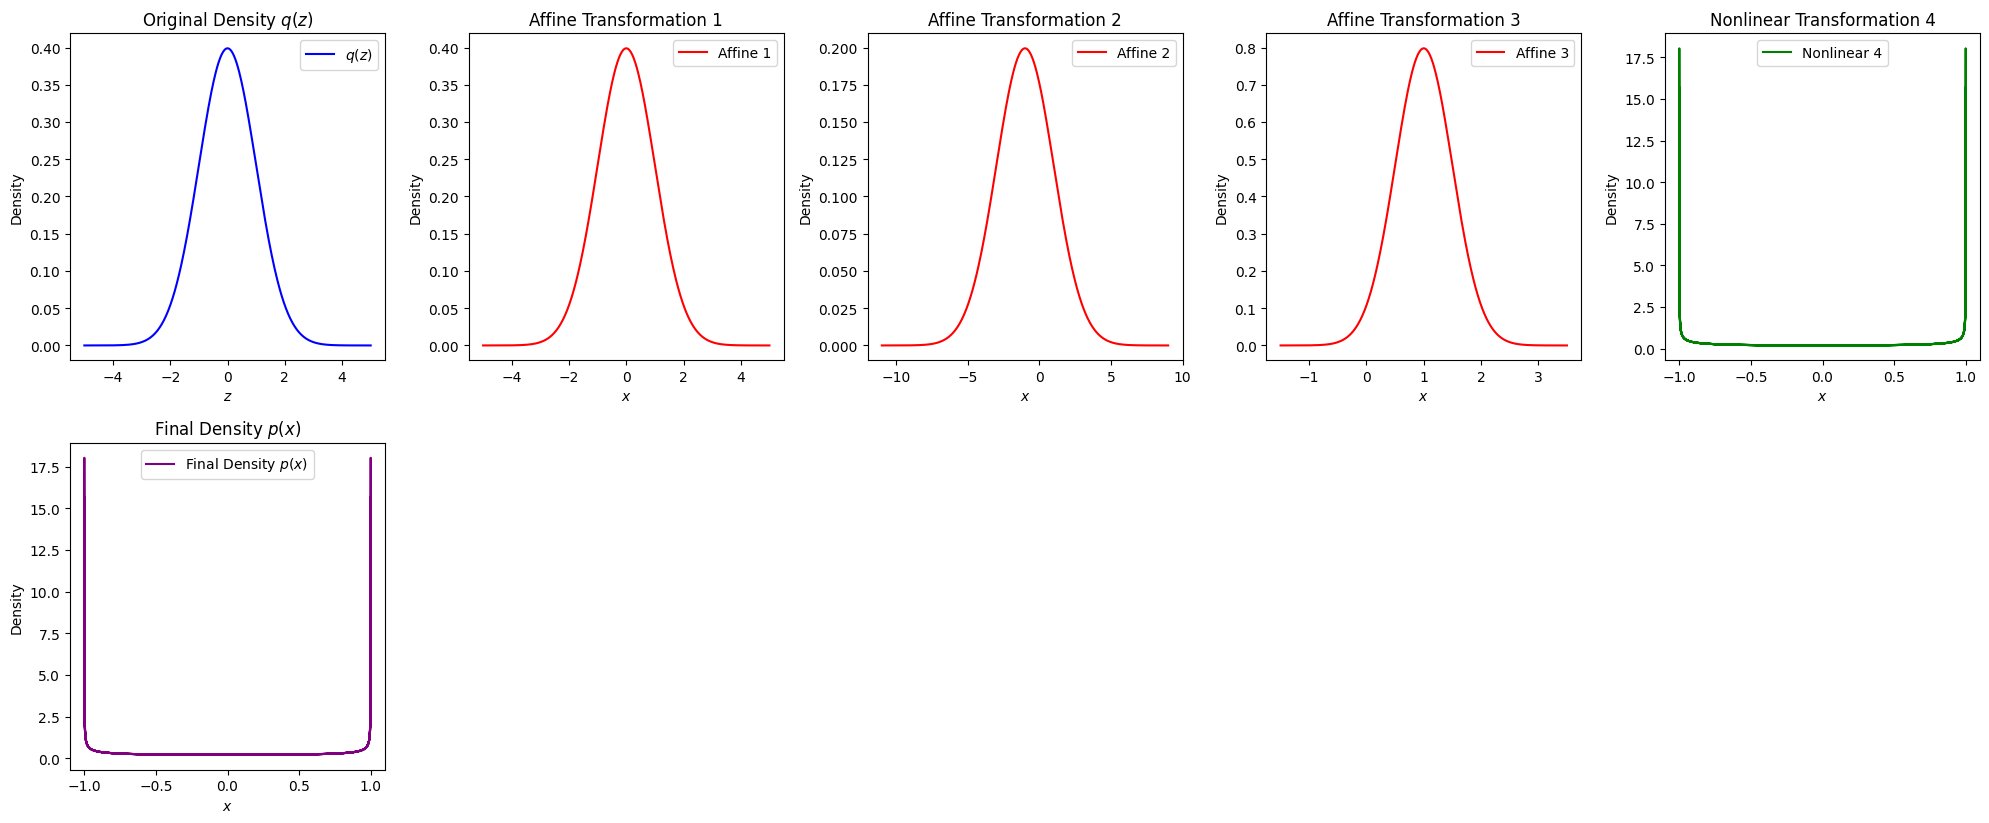

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original standard normal distribution q(z)
def q(z):
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

# Define affine transformations and their Jacobian determinants
def affine_transform(z, a, b):
    return a * z + b

def jacobian_determinant(a):
    return abs(a)

# Define more complex transformations
def nonlinear_transform(z, a, b):
    return np.sin(a * z + b)

def jacobian_determinant_nonlinear(a, z):
    return abs(a * np.cos(a * z))

# Parameters for transformations
transforms = [
    {'type': 'affine', 'a': 1.0, 'b': 0.0},  # Identity transformation
    {'type': 'affine', 'a': 2.0, 'b': -1.0}, # Scaling and shifting
    {'type': 'affine', 'a': 0.5, 'b': 1.0},  # Another scaling and shifting
    {'type': 'nonlinear', 'a': 2.0, 'b': 0.0} # Nonlinear transformation
]

# Create a range of z values
z_values = np.linspace(-5, 5, 400)
q_z_values = q(z_values)

# Initialize x values and the final density p(x)
x_values = z_values
p_x_values = q_z_values

# Plot original density
plt.figure(figsize=(20, 12))

# Plot the original density q(z)
plt.subplot(3, len(transforms)+1, 1)
plt.plot(z_values, q_z_values, label=r'$q(z)$', color='blue')
plt.title("Original Density $q(z)$")
plt.xlabel("$z$")
plt.ylabel("Density")
plt.legend()

# Apply transformations
for i, trans in enumerate(transforms):
    if trans['type'] == 'affine':
        a = trans['a']
        b = trans['b']

        # Apply the affine transformation
        x_values = affine_transform(z_values, a, b)

        # Compute the transformed density
        p_x_values = q((x_values - b) / a) / abs(a)

        # Plot the transformed density
        plt.subplot(3, len(transforms)+1, i+2)
        plt.plot(x_values, p_x_values, label=f'Affine {i+1}', color='red')
        plt.title(f"Affine Transformation {i+1}")
        plt.xlabel("$x$")
        plt.ylabel("Density")
        plt.legend()

    elif trans['type'] == 'nonlinear':
        a = trans['a']
        b = trans['b']

        # Apply the nonlinear transformation
        x_values = nonlinear_transform(z_values, a, b)

        # Compute the transformed density
        jacobian_dets = jacobian_determinant_nonlinear(a, z_values)
        p_x_values = q(np.arcsin(x_values) / a) / np.abs(jacobian_dets)

        # Plot the transformed density
        plt.subplot(3, len(transforms)+1, i+2)
        plt.plot(x_values, p_x_values, label=f'Nonlinear {i+1}', color='green')
        plt.title(f"Nonlinear Transformation {i+1}")
        plt.xlabel("$x$")
        plt.ylabel("Density")
        plt.legend()

# Plot the final density p(x)
plt.subplot(3, len(transforms)+1, len(transforms)+2)
plt.plot(x_values, p_x_values, label='Final Density $p(x)$', color='purple')
plt.title("Final Density $p(x)$")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()
